<a href="https://colab.research.google.com/github/akshat-020/Credit-Card-Fraud-Detection/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [32]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [33]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [34]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)

In [35]:
fraud_percentage

0.17

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
df.drop(['Time'], axis=1, inplace=True)

Normalise the Amount column

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.drop_duplicates(inplace=True)

In [39]:
df.shape


(275663, 30)

Split the data:


In [40]:

X= df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y=df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [41]:
%matplotlib inline

In [42]:
#@title
#sns.pairplot(df)

In [43]:
#sns.barplot(x='V1', y='Amount',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


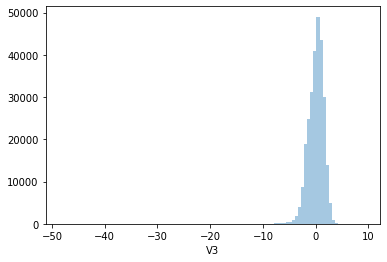

In [44]:
sns.distplot(df['V3'],bins=100,kde=False)

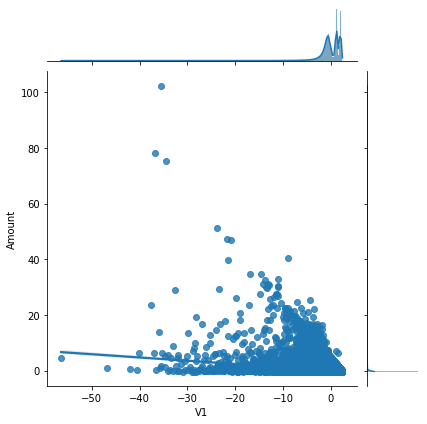

In [45]:
sns.jointplot(x=df['V1'], y=df['Amount'],kind='reg')

In [46]:
dfc=df.corr()

In [47]:
dfc

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.009002,0.005952,-0.000042,-0.018593,-0.005789,-0.006843,-0.000490,-0.007093,0.003115,...,0.006004,0.003634,-0.007504,-0.009327,-0.004446,-0.002436,-0.014628,-0.003555,-0.225854,-0.094718
V2,0.009002,1.000000,0.004976,-0.004095,0.004655,0.004290,0.004866,0.003743,0.001116,0.002764,...,-0.003881,0.002909,-0.003689,0.001974,-0.002837,-0.000296,0.007252,0.001458,-0.534153,0.084754
V3,0.005952,0.004976,1.000000,-0.000721,0.011020,0.014780,-0.014016,0.003733,-0.002896,-0.011064,...,0.001818,-0.004203,0.002183,0.009782,0.004091,0.003596,-0.008780,-0.002454,-0.220547,-0.185772
V4,-0.000042,-0.004095,-0.000721,1.000000,0.006710,0.012535,0.000806,0.004996,0.001395,0.003366,...,-0.000623,0.001581,-0.000155,0.005759,0.000173,-0.001105,0.002517,0.000028,0.100626,0.130313
V5,-0.018593,0.004655,0.011020,0.006710,1.000000,-0.029701,-0.009107,-0.002605,-0.000786,-0.002818,...,0.003439,0.002971,-0.001058,-0.012634,-0.004862,-0.001568,-0.006116,-0.000711,-0.390280,-0.088642
V6,-0.005789,0.004290,0.014780,0.012535,-0.029701,1.000000,0.013087,-0.012301,-0.002290,-0.002723,...,-0.001584,0.002355,-0.000221,-0.021098,-0.006673,0.000702,-0.001577,0.000617,0.224967,-0.044777
V7,-0.006843,0.004866,-0.014016,0.000806,-0.009107,0.013087,1.000000,-0.000987,-0.001657,-0.012246,...,0.008635,-0.001701,0.003458,0.005375,0.002070,-0.000459,-0.003977,0.001329,0.401573,-0.173292
V8,-0.000490,0.003743,0.003733,0.004996,-0.002605,-0.012301,-0.000987,1.000000,0.000168,0.000239,...,0.018806,-0.005182,0.006461,-0.006000,-0.002827,-0.001122,-0.000108,0.000201,-0.104572,0.033364
V9,-0.007093,0.001116,-0.002896,0.001395,-0.000786,-0.002290,-0.001657,0.000168,1.000000,-0.004957,...,0.001744,0.000742,-0.001739,-0.002454,-0.000358,0.005307,0.008066,0.006487,-0.041446,-0.094583
V10,0.003115,0.002764,-0.011064,0.003366,-0.002818,-0.002723,-0.012246,0.000239,-0.004957,1.000000,...,0.002396,-0.003012,0.001760,0.001015,0.002499,-0.000859,0.011495,0.009956,-0.104586,-0.208104


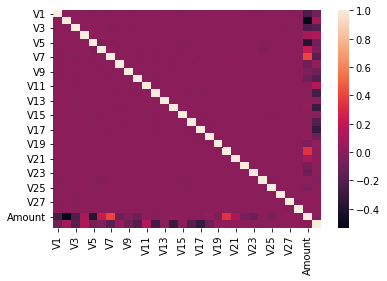

In [48]:
sns.heatmap(dfc)

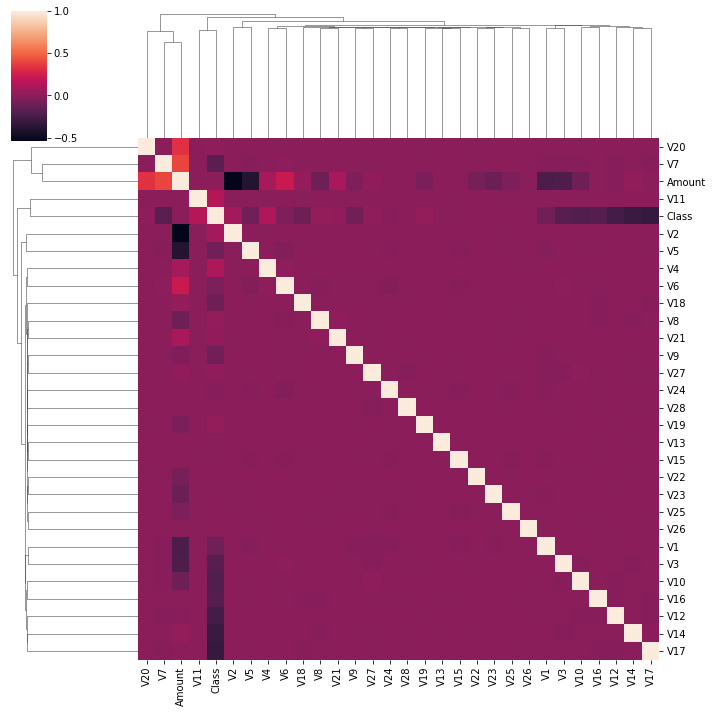

In [49]:
#df.pivot_table(index='',columns='',values='')
sns.clustermap(dfc)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


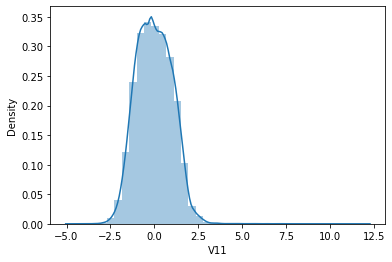

In [50]:
sns.distplot(df['V11'],bins=40)

LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression()

In [53]:
lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_out=lr.predict(X_test)

In [55]:
y_out


array([0, 0, 0, ..., 0, 0, 0])

accuracy


In [56]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test,y_out)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test,y_out)))



Accuracy score of the Logistic Regression model is 0.9989552498694062
F1 score of the Logistic Regression model is 0.6666666666666666


In [60]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier

K-Nearest Neighbors


In [61]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [62]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.999288989494457
F1 score of the K-Nearest Neighbors model is 0.7949790794979079


Support Vector Machines


In [63]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [64]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))


Accuracy score of the Support Vector Machines model is 0.999318010331418
F1 score of the Support Vector Machines model is 0.7813953488372093


RANDOM FOREST/Decision tree


In [65]:

DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [67]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))

print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))



Accuracy score of the Decision Tree model is 0.9991438853096524
F1 score of the Decision Tree model is 0.7467811158798283
Accuracy score of the Random Forest model is 0.9991293748911718
F1 score of the Random Forest model is 0.7222222222222223


XGBOOST


In [68]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [69]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9994486040977422
F1 score of the XGBoost model is 0.831858407079646
